# [microSAM](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html)
see https://github.com/computational-cell-analytics/micro-sam/blob/master/examples/use_as_library/instance_segmentation.py

In [1]:
import sys, os; sys.path += [os.path.join(os.path.expanduser('~'), 'thesis')]  # NOTE hardcoded project root to find shared util modules

from micro_sam import instance_segmentation, util
import imageio.v3 as imageio
import pandas as pd
import itertools as it
import os
from datetime import datetime

from util.label_studio_converter__brush import mask2rle
from util.plot import *


_cache_dir = os.path.join(os.path.expanduser('~'), '.cache', 'micro-sam', 'TEMPORARY-TIMING')

In [2]:
dataset_id = 'third'

models = 'vit_b vit_l vit_h'.split(' ')
iou_thresh = 0.88

cache_dir = os.path.join(_cache_dir, dataset_id)
os.makedirs(cache_dir, exist_ok=True)

In [3]:

out = pd.DataFrame()

for model in models:
  T0 = datetime.now()
  predictor = util.get_sam_model(model_type=model)
  T_load_predictor = (datetime.now() - T0).total_seconds()

  for imgid in [1]:

    pImage = f"../data/{dataset_id}/{imgid}.jpg"
    pEmbed = f"{cache_dir}/embed.{model}.{imgid}.zarr"
    pMasks = f"{cache_dir}/masks.{model}.{imgid}.npy"
    pRLEs  = f"{cache_dir}/rles.{model}.{imgid}.str"


    image = imageio.imread(pImage)

    print('LOADING'  if os.path.exists(pEmbed) else
          'WRITING', f'embedding cache at {pEmbed}')

    T0 = datetime.now()
    embeddings = util.precompute_image_embeddings(
      predictor, image, ndim = 2, save_path=pEmbed,
      tile_shape=(tile:=1024, tile), halo=(halo:=tile//4, halo)
    )
    T_embed = (datetime.now() - T0).total_seconds()

    T0 = datetime.now()
    amg = instance_segmentation.TiledAutomaticMaskGenerator(predictor)
    T_load_amg = (datetime.now() - T0).total_seconds()

    T0 = datetime.now()
    amg.initialize(image, embeddings, verbose=True)
    insts = amg.generate(pred_iou_thresh=iou_thresh)  # can try different

    masks = instance_segmentation.mask_data_to_segmentation(
      insts, shape=image.shape, with_background=True)        ## TODO: what does this function do with overlapping instances?
    T_segment = (datetime.now() - T0).total_seconds()

    np.save(pMasks, masks)

    rles = [mask2rle(I['segmentation'].astype(np.uint8)) for I in insts]
    with open(pRLEs, 'w') as f: f.write(str(rles))

    out = pd.concat([out, pd.DataFrame(dict(
      model = [model],
      imgid = [imgid],
      image = [pImage],
      embed = [pEmbed],
      masks = [pMasks],
      rles  = [pRLEs],
      T_embed = [T_embed],
      T_load_predictor = [T_load_predictor],
      T_load_amg = [T_load_amg],
      T_segment = [T_segment],
    ))], ignore_index=True)

LOADING embedding cache at /gpfs/space/home/eckhardt/.cache/micro-sam/TEMPORARY-TIMING/third/embed.vit_b.1.zarr


Predict masks for point grid prompts:   6%|▋         | 1/16 [00:15<03:53, 15.57s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:28<03:13, 13.83s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:40<02:51, 13.21s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:53<02:35, 12.94s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [01:06<02:22, 12.94s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [01:18<02:08, 12.81s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:31<01:54, 12.76s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:44<01:41, 12.75s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:56<01:29, 12.76s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [02:09<01:16, 12.72s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [02:22<01:03, 12.73s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [02:35<00:51, 12.76s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [02:48<00:38, 12.83s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [03:00<00:25, 12.82s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [03:13<00:12, 12.82s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [03:26<00:00, 12.91s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [03:26<00:00, 12.92s/it]


Compute masks for tile:  25%|██▌       | 1/4 [03:26<10:20, 206.87s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:13<03:22, 13.51s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:26<03:05, 13.22s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:39<02:50, 13.12s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:52<02:36, 13.04s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [01:05<02:22, 12.94s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [01:18<02:09, 12.94s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:31<01:56, 12.92s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:44<01:45, 13.13s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:58<01:32, 13.25s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [02:11<01:19, 13.24s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [02:24<01:05, 13.13s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [02:36<00:51, 12.98s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [02:50<00:39, 13.07s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [03:03<00:26, 13.09s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [03:16<00:13, 13.11s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [03:29<00:00, 12.99s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [03:29<00:00, 13.07s/it]


Compute masks for tile:  50%|█████     | 2/4 [06:56<06:56, 208.22s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:11<02:59, 11.98s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:23<02:45, 11.85s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:35<02:35, 11.94s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:47<02:22, 11.87s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:59<02:10, 11.84s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [01:11<01:58, 11.82s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:23<01:47, 11.91s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:34<01:34, 11.78s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:46<01:22, 11.82s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:58<01:10, 11.75s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [02:09<00:58, 11.63s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [02:20<00:45, 11.47s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [02:31<00:33, 11.27s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:42<00:22, 11.05s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:52<00:10, 10.74s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [03:01<00:00, 10.32s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [03:01<00:00, 11.34s/it]


Compute masks for tile:  75%|███████▌  | 3/4 [09:57<03:15, 195.99s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:09<02:18,  9.22s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:18<02:09,  9.26s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:28<02:05,  9.63s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:38<01:54,  9.58s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:47<01:45,  9.62s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:57<01:36,  9.70s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:07<01:26,  9.66s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:16<01:15,  9.46s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:24<01:04,  9.22s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:33<00:53,  8.96s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:42<00:44,  8.99s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:52<00:37,  9.26s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [02:02<00:28,  9.47s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:12<00:19,  9.65s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:22<00:09,  9.76s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:32<00:00,  9.81s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:32<00:00,  9.51s/it]


Compute masks for tile: 100%|██████████| 4/4 [12:29<00:00, 178.75s/it]

Compute masks for tile: 100%|██████████| 4/4 [12:29<00:00, 187.45s/it]

LOADING embedding cache at /gpfs/space/home/eckhardt/.cache/micro-sam/TEMPORARY-TIMING/third/embed.vit_l.1.zarr


Predict masks for point grid prompts:   6%|▋         | 1/16 [00:09<02:23,  9.54s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:18<02:12,  9.45s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:29<02:08,  9.86s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:39<02:00, 10.06s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:50<01:53, 10.32s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [01:00<01:42, 10.29s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:11<01:33, 10.35s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:21<01:23, 10.44s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:32<01:12, 10.39s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:42<01:02, 10.37s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:52<00:51, 10.30s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [02:02<00:41, 10.28s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [02:13<00:30, 10.29s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:23<00:20, 10.25s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:33<00:10, 10.29s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:44<00:00, 10.35s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:44<00:00, 10.26s/it]


Compute masks for tile:  25%|██▌       | 1/4 [02:44<08:12, 164.16s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:10<02:37, 10.48s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:20<02:22, 10.18s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:30<02:12, 10.20s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:40<02:01, 10.16s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:50<01:49,  9.98s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [01:00<01:39, 10.00s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:10<01:29,  9.96s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:20<01:20, 10.03s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:30<01:10, 10.11s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:41<01:01, 10.24s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:51<00:51, 10.26s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [02:02<00:41, 10.35s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [02:12<00:30, 10.33s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:22<00:20, 10.33s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:33<00:10, 10.33s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:43<00:00, 10.30s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:43<00:00, 10.21s/it]


Compute masks for tile:  50%|█████     | 2/4 [05:27<05:27, 163.78s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:09<02:18,  9.21s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:18<02:08,  9.16s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:27<01:57,  9.03s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:36<01:50,  9.25s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:46<01:42,  9.29s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:55<01:33,  9.31s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:04<01:22,  9.20s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:14<01:14,  9.34s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:23<01:05,  9.32s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:32<00:55,  9.33s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:42<00:46,  9.33s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:51<00:37,  9.29s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [01:59<00:27,  9.10s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:09<00:18,  9.14s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:18<00:09,  9.11s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:27<00:00,  9.16s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:27<00:00,  9.22s/it]


Compute masks for tile:  75%|███████▌  | 3/4 [07:55<02:36, 156.40s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:09<02:17,  9.16s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:18<02:08,  9.17s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:27<02:01,  9.32s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:36<01:50,  9.22s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:45<01:40,  9.16s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:55<01:31,  9.19s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:04<01:22,  9.13s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:13<01:13,  9.21s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:22<01:04,  9.20s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:31<00:54,  9.04s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:40<00:45,  9.11s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:49<00:36,  9.05s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [01:59<00:27,  9.15s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:08<00:18,  9.12s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:17<00:09,  9.11s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:26<00:00,  9.16s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:26<00:00,  9.15s/it]


Compute masks for tile: 100%|██████████| 4/4 [10:21<00:00, 152.48s/it]

Compute masks for tile: 100%|██████████| 4/4 [10:21<00:00, 155.44s/it]

LOADING embedding cache at /gpfs/space/home/eckhardt/.cache/micro-sam/TEMPORARY-TIMING/third/embed.vit_h.1.zarr


Predict masks for point grid prompts:   6%|▋         | 1/16 [00:09<02:24,  9.64s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:18<02:10,  9.34s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:27<01:59,  9.20s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:36<01:48,  9.07s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:45<01:39,  9.06s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:54<01:30,  9.04s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [01:03<01:21,  9.03s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:11<01:10,  8.77s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:20<01:00,  8.60s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:28<00:50,  8.48s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:36<00:42,  8.43s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:45<00:33,  8.40s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [01:53<00:25,  8.39s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [02:01<00:16,  8.39s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:10<00:08,  8.34s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:18<00:00,  8.34s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:18<00:00,  8.65s/it]


Compute masks for tile:  25%|██▌       | 1/4 [02:18<06:55, 138.44s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:07<01:59,  7.99s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:15<01:51,  7.95s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:24<01:44,  8.08s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:32<01:36,  8.04s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:40<01:29,  8.13s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:48<01:21,  8.15s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:56<01:13,  8.19s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:05<01:05,  8.17s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:13<00:57,  8.21s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:21<00:49,  8.24s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:29<00:41,  8.26s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:38<00:33,  8.33s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [01:46<00:24,  8.27s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [01:55<00:16,  8.39s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [02:03<00:08,  8.39s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:11<00:00,  8.32s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:11<00:00,  8.23s/it]


Compute masks for tile:  50%|█████     | 2/4 [04:30<04:29, 134.55s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:07<01:51,  7.46s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:15<01:46,  7.58s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:22<01:38,  7.58s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:30<01:31,  7.67s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:38<01:24,  7.68s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:46<01:17,  7.75s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:53<01:09,  7.70s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:01<01:00,  7.60s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:08<00:53,  7.65s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:16<00:45,  7.57s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:24<00:38,  7.64s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:31<00:30,  7.59s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [01:39<00:22,  7.57s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [01:46<00:15,  7.55s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [01:54<00:07,  7.56s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:01<00:00,  7.53s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:01<00:00,  7.60s/it]


Compute masks for tile:  75%|███████▌  | 3/4 [06:31<02:08, 128.65s/it]

Predict masks for point grid prompts:   6%|▋         | 1/16 [00:07<01:51,  7.43s/it]

Predict masks for point grid prompts:  12%|█▎        | 2/16 [00:15<01:46,  7.60s/it]

Predict masks for point grid prompts:  19%|█▉        | 3/16 [00:22<01:37,  7.48s/it]

Predict masks for point grid prompts:  25%|██▌       | 4/16 [00:30<01:30,  7.53s/it]

Predict masks for point grid prompts:  31%|███▏      | 5/16 [00:37<01:23,  7.58s/it]

Predict masks for point grid prompts:  38%|███▊      | 6/16 [00:45<01:15,  7.60s/it]

Predict masks for point grid prompts:  44%|████▍     | 7/16 [00:53<01:08,  7.62s/it]

Predict masks for point grid prompts:  50%|█████     | 8/16 [01:00<01:00,  7.62s/it]

Predict masks for point grid prompts:  56%|█████▋    | 9/16 [01:08<00:53,  7.58s/it]

Predict masks for point grid prompts:  62%|██████▎   | 10/16 [01:15<00:45,  7.62s/it]

Predict masks for point grid prompts:  69%|██████▉   | 11/16 [01:23<00:37,  7.54s/it]

Predict masks for point grid prompts:  75%|███████▌  | 12/16 [01:30<00:30,  7.60s/it]

Predict masks for point grid prompts:  81%|████████▏ | 13/16 [01:38<00:22,  7.60s/it]

Predict masks for point grid prompts:  88%|████████▊ | 14/16 [01:46<00:15,  7.57s/it]

Predict masks for point grid prompts:  94%|█████████▍| 15/16 [01:53<00:07,  7.66s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:01<00:00,  7.67s/it]

Predict masks for point grid prompts: 100%|██████████| 16/16 [02:01<00:00,  7.60s/it]


Compute masks for tile: 100%|██████████| 4/4 [08:33<00:00, 125.92s/it]

Compute masks for tile: 100%|██████████| 4/4 [08:33<00:00, 128.41s/it]

In [4]:
out

,model,imgid,image,embed,masks,rles,T_embed,T_load_predictor,T_load_amg,T_segment
0,vit_b,1,../data/third/1.jpg,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,0.111294,2.277624,0.000485,770.110254
1,vit_l,1,../data/third/1.jpg,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,0.013323,6.484828,0.307372,637.770242
2,vit_h,1,../data/third/1.jpg,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,/gpfs/space/home/eckhardt/.cache/micro-sam/TEM...,0.011004,18.425170,0.308381,528.426764


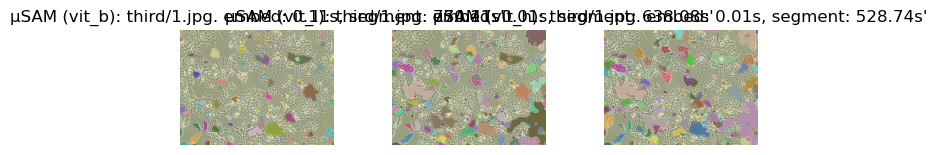

In [5]:
colors = colorcet.m_glasbey.colors

fig, axs = plt.subplots(1, 3, figsize=(13/2, 10*3/2))
plt.tight_layout()

for ax, (_, it) in zip(axs.flat, out.iterrows()):
  image = imageio.imread(it['image'])
  masks = np.load(it['masks'])

  ax.set_title(f"µSAM ({it['model']}): third/{it['imgid']}.jpg. embed: {it['T_embed']:.2f}s, segment: {it['T_segment'] + it['T_load_amg']:.2f}s'")
  ax.axis('off')

  ax.imshow(skimage.color.label2rgb(
    masks, image, saturation=1, bg_color=None, alpha=0.5, colors=colors)
  )